# Lab-P11: Files and Formats for Youtube Data

In p11 you will be analyzing YouTube data. In lab-p11, we will help you setup the data and some functions that you have already developed in p10 or lab-p10. In addition, we will introduce scatter plots and help you write a recursive function.

------------------------

In [4]:
# import statements

import os
import csv
import json
import pandas
import matplotlib
from collections import namedtuple


In [35]:
%matplotlib inline

------------------------

## Segment 1: Setup
### Task 1: Build helper functions for project preparation

We need to borrow some codes from p10 and lab-p10 to here, these functions are what you need in p11. Helper functions are listed below:

* `read_json(path)` (from lab-p10)
* `get_mapping(pathname)` (from p10)
* `Comment` type definition (from p10)
* `get_comment_data(comment_file)` (from p10)
* `bucketize(attribute, videos)` (from p10)
* `plot_dict(d, label="Please Label Me!!!")` (from lab-p9)
* `process_csv(filename)` (from lab-p10)
* `list_files_in(pathname)` (from lab-p10)
* `list_paths_in(pathname)` (from lab-p10)
* Invocation of `list_paths_in` (from p10)
* Code to populate `comment_paths` (from p10)
* Code to populate `channel_paths` (from p10)
* Code to populate `channel_dict` (from p10)
* Code to populate `comments` (from p10)
* Code to populate `comment_buckets` (from p10)
* `get_videos(data_file, video_mapping_file)` (from p10)


Make sure to download data.zip from Github and extract it to your lab11 folder.

**P.S. If you haven’t finished P10, go straight to Segment 2.**

In [7]:
# This entire cell should be pasted into your P11 notebook

## From lab-p9

def plot_dict(d, label="Please Label Me!!!"):
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16)
    ax.set_ylabel(label, fontsize=16)

    
## From lab-p10

def process_csv(filename):
    exampleFile = open(filename, encoding="utf-8")  
    exampleReader = csv.reader(exampleFile) 
    exampleData = list(exampleReader)        
    exampleFile.close()  
    return exampleData


## From lab-p10

def read_json(path):
    with open(path, encoding='utf-8') as f:
        return json.load(f)
    

## From lab-p10

def list_files_in(pathname):
    """
    Given a (relative) path called pathname, return a list of files at this path. 
    Make sure to exclude files that start with a "." from your list, 
    and that your list of files is sorted alphabetically before you return it.
    """
    
    files_list = os.listdir("./" + pathname)
    
    files_list.sort()
    
    files_list = [file for file in files_list if file[0] != "."]
    
    return files_list


## From lab-p10

def list_paths_in(pathname):
    """
    Gets a list of files in pathname directory and generates relative paths to all the files,
    using os.path.join function.
    Returns a list of relative paths to each file inside pathname directory.
    """
    files = list_files_in(pathname)
    
    specific_file_path = [os.path.join(pathname, file) for file in files]

    return specific_file_path


## From p10 (Q2)
## Use `list_paths_in` to list all paths in the data directory
## Save this to a variable called all_paths

all_paths = list_paths_in("data")


## From p10 (Q3)
## Code to populate `comment_paths`

comment_paths = [path for path in all_paths if "comment_data" in path]


## From p10 (Q4)
## Code to populate `channel_paths` 

channel_paths = [path for path in all_paths if "channel_ids" in path]


# Using the get_mapping function from lab10

def get_mapping(pathname):
    """
    Given a path called pathname, load the json data at the path and return the loaded json data.
    If a json.JSONDecodeError is thrown, an empty dictionary is returned.
    """
    try:
        mapped_data = read_json(pathname) 
        
    except json.JSONDecodeError:
        mapped_data = {}

    return mapped_data


## From p10 (Q6)
## Code to populate `channel_dict` 

channel_dict = {}

for file in channel_paths:
    channel_dict.update(get_mapping(file))

    
# Creating a namedtuple to represent a Comment that has the following attributes...
# video_id, author_id, and published_at are strings and comment_length and likes are ints. 

Comment = namedtuple("Comment", ["video_id", "comment_length", "author_id", "likes", "published_at"])


## From p10 (Q7)

def get_comment_data(comment_file):
    csv_data = process_csv(comment_file)
    
    header = csv_data[0] 
    comment_rows = csv_data[1:]

    comment_id_idx = header.index("comment_id")
    video_id_idx = header.index("video_id")
    comment_length_idx = header.index("comment_length")
    author_id_idx = header.index("author_id")
    likes_idx = header.index("likes")
    published_at_idx = header.index("published_at")

    comment_dict = {}
    
    for comment in comment_rows:
        if "" in comment:
            continue
 
        try:     
            key = comment[comment_id_idx]

            value = Comment(comment[video_id_idx], int(comment[comment_length_idx]), \
                            comment[author_id_idx], int(comment[likes_idx]), comment[published_at_idx])

            comment_dict[key] = value
        
        except ValueError:
            continue

        except IndexError:
            continue
            
    return comment_dict


## From p10 (Q8)
## Code to populate `comments` 

comments = {}

for file in comment_paths:
    comments.update(get_comment_data(file))


## From p10 (Q12)
## Code to populate `comment_buckets` 

comment_buckets = {}

for comment in comments:
    video_id = comments[comment].video_id
    
    if video_id not in comment_buckets:
        comment_buckets[video_id] = []
    
    if video_id in comment_buckets:
        comment_buckets[video_id].append(comment)


## From p10

def get_videos(data_file, video_mapping_file):
    """
    Given data_file (csv file) and video_mapping_file (json) file, generates a video
    dictionary, mapping video ID to a dictionary containing title, and other details of the video.
    Handles missing entry in video_ids.json by using try / except blocks to handle KeyError.
    """
    data = process_csv(data_file)
    
    header = data[0]
    all_videos = data[1:]
    
    video_mapping = get_mapping(video_mapping_file)
    videos_dict = dict()
    
    for video in all_videos:
        try:
            key = video[header.index('video_id')]
            
            title = video_mapping[key]
            channel_name = channel_dict[video[header.index('channel_id')]]
            published_at = video[header.index('published_at')] 
            duration = video[header.index('duration')] 
            category = video[header.index('category')] 
            views = int(video[header.index('views')])
            tags = video[header.index('tags')].split("|")
            likes = video[header.index('likes')]
            dislikes = video[header.index('dislikes')]
            comments = comment_buckets[key]
            

            if likes != "" and dislikes != "": 
                ratings_enabled = True
                likes = int(likes)
                dislikes = int(dislikes)

            else:
                ratings_enabled = False
                likes = None
                dislikes = None
            
            value = {'title': title, 
                     'channel_name': channel_name,
                     'published_at': published_at, 
                     'duration': duration, 
                     'category': category, 
                     'views': views,
                     'tags': tags,
                     'likes': likes,
                     'dislikes': dislikes,
                     'ratings_enabled': ratings_enabled,
                     'comments': comments
                    }
            
            videos_dict[key] = value
        
        except KeyError:
            continue
    
    return videos_dict


## From p10 (Q13), create a dictionary named `videos` and use `get_videos` to fill the information in the 
## `videos`.
## Populate the variable named `videos` to answer

videos = get_videos(os.path.join('data','video_data.csv'), os.path.join('data','video_ids.json'))

sample = ['UgzgwN2JXxjTN4mR5954AaABAg.9TPxukUd20g9TQLnJi3RFU', 'UgzvogxMg82Kj0aW84x4AaABAg']
for s in sample:
    assert s in videos['fkMW60W180E']['comments']
    

## From p10 (Q17)
## Make sure to remove default argument to videos. If you want to retain it,
## you will have to define get_videos function before bucketize and make sure
## you call get_videos and store the return value into the variable videos

# Implementing bucketize function similar to P9

def bucketize(attribute, videos = videos):
    """
    Input: A dict of videos and an attribute string.
    Return: A dictionary that bucketizes the `video_ids` by `attribute`.
    """
    bucketized_dict = {}

    list_atr = ["tags", "comments"]
    
    for video in videos:
        atr = videos[video][attribute]

        if attribute in list_atr:
            for item in atr:
                if item not in bucketized_dict:
                    bucketized_dict[item] = []  
                
                if item in bucketized_dict:
                    bucketized_dict[item].append(video)
        
        else:
            if atr not in bucketized_dict:
                bucketized_dict[atr] = []

            if atr in bucketized_dict:
                bucketized_dict[atr].append(video)

    return bucketized_dict

category_dict = bucketize('category')
assert category_dict['Pets & Animals'] == ['Hz_DslzN2IA', 'AwvyrO_yM4c']


------------------------

In [8]:
## Display all_paths, defined above, here

all_paths


['data/channel_ids1.json',
 'data/channel_ids2.json',
 'data/channel_ids3.json',
 'data/channel_ids4.json',
 'data/channel_ids5.json',
 'data/comment_data1.csv',
 'data/comment_data2.csv',
 'data/comment_data3.csv',
 'data/comment_data4.csv',
 'data/comment_data5.csv',
 'data/video_data.csv',
 'data/video_ids.json']

You can display your all_files, and it should look like:
```python
['data/channel_ids1.json',
 'data/channel_ids2.json',
 'data/channel_ids3.json',
 'data/channel_ids4.json',
 'data/channel_ids5.json',
 'data/comment_data1.csv',
 'data/comment_data2.csv',
 'data/comment_data3.csv',
 'data/comment_data4.csv',
 'data/comment_data5.csv',
 'data/video_data.csv',
 'data/video_ids.json']
```

------------------------

Are you able to understand what the below code checks? TODO: discuss with your lab partner.
If any of the following assertions fail, check your code! 

In [9]:
## From p10 (Q4), What are the paths of all the files whose name contains `channel_ids` in our data directory?
## Let's do some verification

for idx in range(len(channel_paths)):
    path = channel_paths[idx]
    assert path == 'data/channel_ids' + str(idx + 1) + '.json'


------------------------

In [10]:
## From p10 (Q6), create a mapping dictionary for channel ID and the name of channel
## Let's verify our `channel_dict`

assert len(channel_dict) == 372
assert channel_dict["UCpi8TJfiA4lKGkaXs__YdBA"] == 'The Try Guys'
assert channel_dict["UCERUmrDh9hmqEXBsnYFNTIA"] == 'DashieGames'
assert channel_dict["UC3xZYc4SZUGfRERIvDRGqDQ"] == 'Skip the Tutorial'
assert channel_dict["UCfLuMSIDmeWRYpuCQL0OJ6A"] == 'Kwebbelkop'


------------------------

If any of the following assertions fail, check your code! 

In [11]:
## From p10 (Q3), What are the paths of all the files whose name contains comment_data in our data directory?
## Let's do some verification

for idx in range(len(comment_paths)):
    path = comment_paths[idx]
    assert path == 'data/comment_data' + str(idx + 1) + '.csv'
    

------------------------

In [12]:
## From p10 (Q12), bucketize the comments data by creating a dictionary mapping video IDs to 
## Let's do some verification

assert len(comment_buckets["A8rrr_w8rfk"]) == 606


------------------------

In [13]:
assert videos['fkMW60W180E']['likes'] == 210951
assert videos['fkMW60W180E']['dislikes'] == 1824
assert videos['fkMW60W180E']['ratings_enabled'] == True
assert videos['UeFnH1DKYIE']['likes'] == None
assert videos['UeFnH1DKYIE']['dislikes'] == None
assert videos['UeFnH1DKYIE']['ratings_enabled'] == False

The functions and data structures you pasted into the first cell of Segment 1 Task 1 are what you need to start p11. Make sure to copy/paste everything in that cell before you start solving p11.

------------------------

## Segment 2: Recursion

As we learned in class, a function is recursive when it calls itself, directly or indirectly. We'll give you some practice here to complete some recursive code.

### Task 2.1: Flatten a Nested List

We are going to write a recursive function to flatten a nested list and print out all the elements in list. Let's consider the simplest case -> 1-dimensional list. Iterate over the 1-dimensional list and simple populate the items into a new list.

In [14]:
def flatten(some_list):
    collection = []
    
    for item in some_list:
        
        if isinstance(item, list):
            collection.extend(flatten(item))
        
        else:
            collection.append(item)
        
    return collection

flatten([1,2,[3,[4,5]]])


[1, 2, 3, 4, 5]

In [15]:
letters = ['a', 'b', 'c', 'd']

assert flatten(letters) == ['a', 'b', 'c', 'd']


So, we made it work for a 1-dimensional list. Now would be a good time for you to review `append` vs `extend` list methods.

In [17]:
list1 = [1, 2, 3, 4]
list1.append([4, 5, 6])
print("Append does this:", list1)

list2 = [1, 2, 3, 4]
list2.extend([4, 5, 6])
print("Extend does this:", list2)


Append does this: [1, 2, 3, 4, [4, 5, 6]]
Extend does this: [1, 2, 3, 4, 4, 5, 6]


Now that we have done a recap on these list methods, let's go back to finishing our `flatten` function. `flatten` handles the simplest case. Recall that, we use the term base case to denote that.

Let's update it to handle n-dimensional nested lists.

In [18]:
nested_letters = ['a', ['b', ['c', ['d']], 'e'], 'f']

flatten(nested_letters)


['a', 'b', 'c', 'd', 'e', 'f']

Are you able to understand what the below code checks? TODO: discuss with your lab partner.
If any of the following assertions fail, check your code! 

In [19]:
assert flatten(nested_letters) == ['a', 'b', 'c', 'd', 'e', 'f']

nested_names_1 = ["Adam", ["Bob", ["Chet", "Cat"], "Barb", "Bert"], "Alex", ["Bea", "Treasure"], \
                  ["Andy"], "Ann"]
assert flatten(nested_names_1) == ['Adam', 'Bob', 'Chet', 'Cat', 'Barb', 'Bert', 'Alex', \
                                   'Bea', 'Treasure', 'Andy', 'Ann']

nested_names_2 = ["Adam", ["Bob", ["Chet", "Cat"], "Barb", "Bert"], "Alex", ["Bea", "Gold"], \
                  ["Andy"], "Ann"]

assert flatten(nested_names_2) == ['Adam', 'Bob', 'Chet', 'Cat', 'Barb', 'Bert', 'Alex', \
                                   'Bea', 'Gold', 'Andy', 'Ann']

------------------------

### Task 2.2: Explore a Directory Recursively

In your Task 2.1, we practiced how to recursively collect elements in a nested list. In Task 2.2, we are going to recursively collect all the paths of files in a given directory. After collecting them, your function `get_all_paths_in` will return a sorted list of paths to files inside this directory. We will use `broken_file` as directory so make sure to download `broken_file.zip` from Github and extract it to your lab11 folder.

In [20]:
# TODO: invoke listdir function to list files and directories inside "broken_file" and sort the returned list

broken_file_contents = sorted(os.listdir("broken_file"))

assert broken_file_contents == ['english_lowercase', 'english_uppercase', 'non_english', 'number.json', 'special']


In [21]:
for item in broken_file_contents:
    path_to_item = os.path.join("broken_file", item)
    
    if os.path.isfile(path_to_item):
        print(path_to_item, "is a file")
    else:
        print(path_to_item, "is a directory")


broken_file/english_lowercase is a directory
broken_file/english_uppercase is a directory
broken_file/non_english is a directory
broken_file/number.json is a file
broken_file/special is a directory


Expected output:
```
broken_file/english_lowercase is a directory
broken_file/english_uppercase is a directory
broken_file/non_english is a directory
broken_file/number.json is a file
broken_file/special is a directory
```

In [26]:
# This cell should be pasted into your p11 notebook

def get_all_paths_in(directory):
    
    all_paths_in_dir = []
    
    dir_contents = sorted(os.listdir(directory))

    for item in dir_contents:
        path_to_item = os.path.join(directory, item)
        
        if os.path.isfile(path_to_item):
            all_paths_in_dir.append(path_to_item)        
        
        else:
            all_paths_in_dir.extend(get_all_paths_in(path_to_item))

    return all_paths_in_dir

get_all_paths_in("broken_file")


['broken_file/english_lowercase/a_to_m/a_to_m.json',
 'broken_file/english_lowercase/rest.json',
 'broken_file/english_uppercase/A_to_E/A/A.json',
 'broken_file/english_uppercase/A_to_E/E.json',
 'broken_file/english_uppercase/A_to_E/rest/rest.json',
 'broken_file/english_uppercase/F_to_K/F_to_H.json',
 'broken_file/english_uppercase/F_to_K/I_to_K/I/I.json',
 'broken_file/english_uppercase/F_to_K/I_to_K/rest.json',
 'broken_file/english_uppercase/L_to_Q/O.json',
 'broken_file/english_uppercase/L_to_Q/rest/L_to_N/M.json',
 'broken_file/english_uppercase/L_to_Q/rest/L_to_N/rest/rest.json',
 'broken_file/english_uppercase/L_to_Q/rest/P_to_Q.json',
 'broken_file/english_uppercase/R_to_W.json',
 'broken_file/english_uppercase/rest.json',
 'broken_file/non_english/korean.json',
 'broken_file/non_english/rest/japanese/japanese.json',
 'broken_file/non_english/rest/rest.json',
 'broken_file/non_english/russian/russian.json',
 'broken_file/number.json',
 'broken_file/special/special.json']

Expected Output:

```python
['broken_file/english_lowercase/a_to_m/a_to_m.json', 
'broken_file/english_lowercase/rest.json',
'broken_file/english_uppercase/A_to_E/A/A.json', 
'broken_file/english_uppercase/A_to_E/E.json',
'broken_file/english_uppercase/A_to_E/rest/rest.json', 
'broken_file/english_uppercase/F_to_K/F_to_H.json',
'broken_file/english_uppercase/F_to_K/I_to_K/I/I.json', 
'broken_file/english_uppercase/F_to_K/I_to_K/rest.json',
'broken_file/english_uppercase/L_to_Q/O.json', 
'broken_file/english_uppercase/L_to_Q/rest/L_to_N/M.json',
'broken_file/english_uppercase/L_to_Q/rest/L_to_N/rest/rest.json', 
'broken_file/english_uppercase/L_to_Q/rest/P_to_Q.json',
'broken_file/english_uppercase/R_to_W.json', 
'broken_file/english_uppercase/rest.json',
'broken_file/non_english/korean.json', 
'broken_file/non_english/rest/japanese/japanese.json',
'broken_file/non_english/rest/rest.json', 
'broken_file/non_english/russian/russian.json',
'broken_file/number.json', 'broken_file/special/special.json']
 ```

In [27]:
# This is a test for get_all_paths_in

assert get_all_paths_in('broken_file') == \
[os.path.join('broken_file', 'english_lowercase', 'a_to_m', 'a_to_m.json'),
                os.path.join('broken_file', 'english_lowercase', 'rest.json'),
                os.path.join('broken_file', 'english_uppercase', 'A_to_E', 'A', 'A.json'),
                os.path.join('broken_file', 'english_uppercase', 'A_to_E', 'E.json'),
                os.path.join('broken_file', 'english_uppercase', 'A_to_E', 'rest', 'rest.json'),
                os.path.join('broken_file', 'english_uppercase', 'F_to_K', 'F_to_H.json'),
                os.path.join('broken_file', 'english_uppercase', 'F_to_K', 'I_to_K', 'I', 'I.json'),
                os.path.join('broken_file', 'english_uppercase', 'F_to_K', 'I_to_K', 'rest.json'),
                os.path.join('broken_file', 'english_uppercase', 'L_to_Q', 'O.json'),
                os.path.join('broken_file', 'english_uppercase', 'L_to_Q', 'rest', 'L_to_N', 'M.json'),
                os.path.join('broken_file', 'english_uppercase', 'L_to_Q', 'rest', 'L_to_N', 'rest', 'rest.json'),
                os.path.join('broken_file', 'english_uppercase', 'L_to_Q', 'rest', 'P_to_Q.json'),
                os.path.join('broken_file', 'english_uppercase', 'R_to_W.json'),
                os.path.join('broken_file', 'english_uppercase', 'rest.json'),
                os.path.join('broken_file', 'non_english', 'korean.json'),
                os.path.join('broken_file', 'non_english', 'rest', 'japanese', 'japanese.json'),
                os.path.join('broken_file', 'non_english', 'rest', 'rest.json'),
                os.path.join('broken_file', 'non_english', 'russian', 'russian.json'),
                os.path.join('broken_file', 'number.json'),
                os.path.join('broken_file', 'special', 'special.json')]


If the above assertion failed, make sure you sorted the list of paths before you returned it from your `get_all_paths_in` function.

------------------------

## Segment 3: Scatterplot
### Task 3.1: Practice drawing scatterplot

In lab-p9, we learned how to draw a bar chart to visualize data. This time, we introduce scatterplot to visualize the correlation between x-axis data and y-axis data. And, we will use some toy datasets to practice how to visualize them.

In [28]:
# This cell should be pasted into your p11 notebook

def scatter(x, y, xlabel="please label me!", ylabel="please label me!"):
    df = pandas.DataFrame({"x":x, "y":y})
    ax = df.plot.scatter(x="x", y="y", color="black", fontsize=16, ylim=0)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.set_xlabel(xlabel, fontsize=16)
    

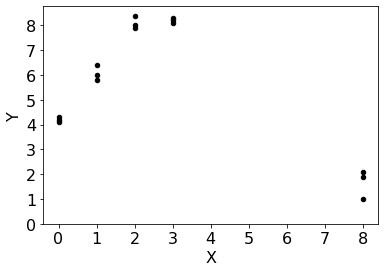

In [29]:
## Let's play with toy dataset to draw scatter plot for it.
## X axis data are in `toy_dataset_x`, and y axis data are in `toy_dataset_y`

toy_dataset_x = [0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 8.0, 8.0, 8.0]
toy_dataset_y = [4.1, 4.3, 4.2, 5.8, 6.0, 6.4, 8.4, 8.0, 7.9, 8.3, 8.1, 8.2, 1.9, 2.1, 1.0]

scatter(toy_dataset_x, toy_dataset_y, "X", "Y")


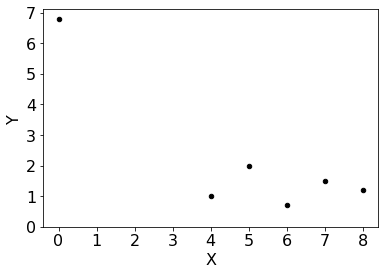

In [30]:
## We can also create a dictionary and use `scatter` function to draw scatter plot.
## Key values in `toy_dataset_dict` are data for x axis, and values in `toy_dataset_dict` are data for y axis.
## Please label x axis and y axis in scatter plot by "X" and "Y".

toy_dataset_dict = {0.0: 6.8, 5.0: 2.0, 4.0: 1.0, 8.0: 1.2, 6.0: 0.7, 7.0: 1.5}

toy_dataset_x = list(toy_dataset_dict.keys())

toy_dataset_y = list(toy_dataset_dict.values())

scatter(toy_dataset_x, toy_dataset_y, "X", "Y")


Remember how dictionary keys are always unique? That can sometimes backfire...
Try making a dictionary where `toy_dataset_x` are the keys, and `toy_dataset_y` are the values.
Then try plotting this dictionary the same way you plotted `toy_dataset_dict`.

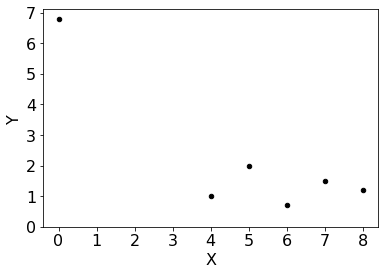

In [31]:
toy_data_dict_2 = {toy_dataset_x[i]: toy_dataset_y[i] for i in range(len(toy_dataset_x))}

toy_data_x = toy_data_dict_2.keys()

toy_data_y = toy_data_dict_2.values()

scatter(toy_data_x, toy_data_y, "X", "Y")


This third plot *should* be identical to the first one - it uses the same x and y values. But the plot now has much fewer points. Is this a good thing or bad thing? It depends on whether you want multiple points with the same x value to be plotted.

------------------------

### Task 3.2: Remove outliers in scatterplot

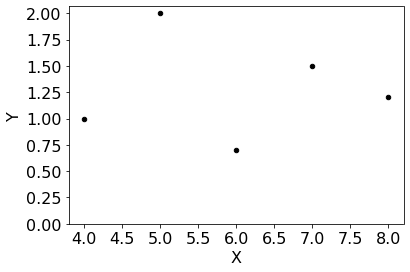

In [32]:
## You can find that there is an outlier datapoint in our dataset located at (0.0, 6.8).

## You can either use dict comprehension or regular code to populate a new dict
## where you conditionally retain any key:value pair whose value is <= 3
## Use this new dictionary to create a scatter plot

toy_dataset_no_outliers = {k:v for (k,v) in toy_dataset_dict.items() if v <= 3}

scatter(toy_dataset_no_outliers.keys(), toy_dataset_no_outliers.values(), "X", "Y")


------------------------

### Task 3.3: Practice scatterplot with videos

In [33]:
for video_id in videos:
    print(videos[video_id]["views"], videos[video_id]["likes"])
    break

3250076 146039


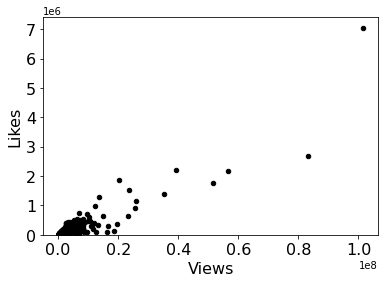

In [34]:
## Let's visualize the correlation between "views" and "likes"

## You can either use dict comprehension or regular code to populate a new dict
## to map "views" to "likes" for every video

views_to_likes_dict = {videos[video_id]['views'] : videos[video_id]['likes'] for video_id in videos}

## Then use the new dictionary for scatter plot visualization
## X-axis should be your "views" and y-axis should be your "likes". Don't forget to label them.

scatter(views_to_likes_dict.keys(), views_to_likes_dict.values(), "Views", "Likes")
